In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/zameen-dec2020-clean-deduped.csv', index_col=0, dtype=np.str)

### Fix dtypes

#### Remove missing values

In [3]:
df.isna().sum()

Purpose                        0
Type                           0
Title                          0
Subtitle                       0
Location                       0
Area                           0
Price                          0
Beds                     1511304
Baths                    1553344
Year of Construction     2823905
Servant Quarters         2883909
Parking Spaces           2779888
Double Glazed Windows          0
Central AC                     0
Park                           0
Jacuzzi                        0
Agency                    368360
Agent                     368374
Titanium Agency?               0
Agency Video                   0
Number of Images               0
Tour Video                     0
Property Verified              0
Date Scraped                   0
URL                            0
Added                          0
Date Last Updated              0
Locality                       0
City                           0
Area_marlas                    0
Price_rupe

In [4]:
# remove listings w/o bed and baths
# baths first, then beds
df = df[~df['Baths'].isna()].copy()
df = df[~df['Beds'].isna()].copy()

In [5]:
df.dtypes

Purpose                  object
Type                     object
Title                    object
Subtitle                 object
Location                 object
Area                     object
Price                    object
Beds                     object
Baths                    object
Year of Construction     object
Servant Quarters         object
Parking Spaces           object
Double Glazed Windows    object
Central AC               object
Park                     object
Jacuzzi                  object
Agency                   object
Agent                    object
Titanium Agency?         object
Agency Video             object
Number of Images         object
Tour Video               object
Property Verified        object
Date Scraped             object
URL                      object
Added                    object
Date Last Updated        object
Locality                 object
City                     object
Area_marlas              object
Price_rupees             object
Age     

In [6]:
# fix datatypes
df['Beds'] = df['Beds'].astype(str).str.replace('.0', '', regex=False).astype(int)
df['Baths'] = df['Baths'].astype(str).str.replace('.0', '', regex=False).astype(int)

df['Area_marlas'] = df['Area_marlas'].astype(float)
df['Price_per_marla'] = df['Price_per_marla'].astype(float)
df['Price_rupees_lakhs'] = df['Price_rupees_lakhs'].astype(float)

df['Number of Images'] = df['Number of Images'].astype(int)

df['Freshness_days'] = df['Freshness_days'].astype(int)
df['Age'] = df['Age'].astype(float)
df['Prob_Fresh'] = df['Prob_Fresh'].astype(float)

df['Date Last Updated'] = pd.to_datetime(df['Date Last Updated'])

### Filter to one day, sales, houses

In [7]:
# 2020-12-08 has the most scrapes
df = df[df['Date Scraped'] == '2020-12-08'].copy()

In [8]:
df['Purpose'].value_counts(normalize=True)

For Sale    0.551801
For Rent    0.448199
Name: Purpose, dtype: float64

In [9]:
df = df[df['Purpose'] == 'For Sale'].copy()

In [10]:
df['Type'].astype(str).value_counts()

House                29004
Flat                 11745
Upper Portion          959
Lower Portion          360
Farm House             190
Penthouse              122
Residential Plot        12
Plot File                7
Commercial Plot          6
Agricultural Land        1
Room                     1
Name: Type, dtype: int64

In [11]:
df = df[df['Type'].isin(['House'])].copy()

In [12]:
df.shape

(29004, 38)

In [13]:
df['City'].value_counts(normalize=True)

Lahore       0.487278
Karachi      0.268894
Islamabad    0.243828
Name: City, dtype: float64

In [14]:
df = df[df['City'].isin(['Lahore'])].copy()

In [15]:
df.reset_index(inplace=True)

In [16]:
df1 = df[['Property ID', 'Type', 'Beds', 'Baths', 'Park', 'Jacuzzi', 'Servant Quarters', 'Parking Spaces', 
          'Double Glazed Windows','Central AC', 'Agency', 'Titanium Agency?', 'Agency Video', 'Number of Images', 
          'Tour Video','Property Verified', 'Locality', 'City', 'Area_marlas', 'Price_rupees_lakhs', 
          'Price_rupees_crores','Price_per_marla', 'Freshness_days', 'Age', 'Prob_Fresh', 
          'Date Last Updated']].copy()

In [17]:
# fill agencies not listed
df1['Agency'] = np.where(df1['Agency'].isna(), 'No Agency Listed', df1['Agency'])

#### Remove price outliers

In [18]:
df1['Price_rupees_crores'] = df1['Price_rupees_crores'].astype(float)

<AxesSubplot:>

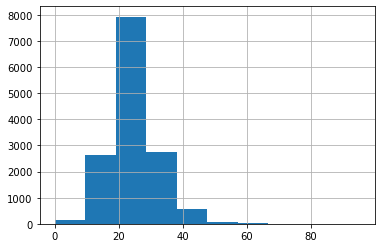

In [19]:
df['Price_per_marla'].hist()

<AxesSubplot:>

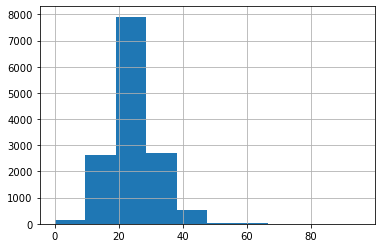

In [20]:
df1[df1['Price_rupees_crores'] < 20]['Price_per_marla'].hist()

<AxesSubplot:>

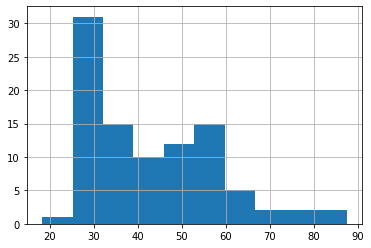

In [21]:
df1[df1['Price_rupees_crores'] > 20]['Price_per_marla'].hist()

In [22]:
df1['Price_rupees_crores'].describe()

count    14133.000000
mean         3.355811
std          4.197246
min          0.006000
25%          1.250000
50%          2.250000
75%          4.350000
max        250.000000
Name: Price_rupees_crores, dtype: float64

<AxesSubplot:>

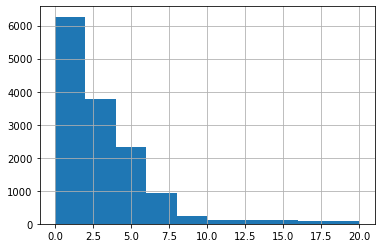

In [23]:
df1['Price_rupees_crores'].hist(range=(0,20))

In [24]:
# q1 = df1['Price_rupees_crores'].quantile(q=0.25)
# q3 = df1['Price_rupees_crores'].quantile(q=0.75)

In [25]:
# df1.shape

In [26]:
# df1 = df1[(df1['Price_rupees_crores'] > q1) & (df1['Price_rupees_crores'] < q3)].copy()

In [27]:
# df1.shape

In [28]:
len(df1[df1['Price_rupees_crores'].astype(float) > 20])

95

In [29]:
# drop rows with outlier prices
df1 = df1[df1['Price_rupees_crores'].astype(float) <= 20].copy()

In [31]:
df1.shape

(14038, 26)

In [32]:
df1['Property ID'].nunique()

14038

### Convert into dummies

In [134]:
df1.columns

Index(['Property ID', 'Type', 'Beds', 'Baths', 'Park', 'Jacuzzi',
       'Servant Quarters', 'Parking Spaces', 'Double Glazed Windows',
       'Central AC', 'Agency', 'Titanium Agency?', 'Agency Video',
       'Number of Images', 'Tour Video', 'Property Verified', 'Locality',
       'City', 'Area_marlas', 'Price_rupees_lakhs', 'Price_rupees_crores',
       'Price_per_marla', 'Freshness_days', 'Age', 'Prob_Fresh',
       'Date Last Updated'],
      dtype='object')

In [135]:
df1 = pd.concat([df1, pd.get_dummies(df1['Type'])], axis=1)

In [136]:
dummy_cols = ['Park', 'Jacuzzi', 'Double Glazed Windows', 'Central AC', 'Titanium Agency?', 'Agency Video', 'Tour Video', 'Property Verified']


In [137]:
for dummy_col in dummy_cols:
    df1[dummy_col] = df1[dummy_col] == 'Yes'
    df1[dummy_col] = df1[dummy_col] * 1

In [138]:
df1 = pd.concat([df1, pd.get_dummies(df1['City'])], axis=1)

In [139]:
df1['Age_group'] = pd.cut(df1['Age'].astype(float), bins=[-1,0,1,5,100], labels=['New', 'Less than 1 years old', 
                                                                           '1-5 years old', '5+ years old'])

In [140]:
df1 = pd.concat([df1, pd.get_dummies(df1['Age_group'])], axis=1)

In [141]:
df1['Images exist'] = np.where(df1['Number of Images'].astype(int) > 0, 1, 0)

#### Freshness

In [142]:
df1['Prob_Fresh'].astype(float).round(1).value_counts(normalize=True)

0.0    0.528921
0.1    0.331814
0.2    0.083773
0.3    0.031059
0.4    0.013677
0.5    0.007124
0.6    0.002849
0.7    0.000784
Name: Prob_Fresh, dtype: float64

### Impute missing values

#### Age

In [143]:
df1['Age_imputed'] = df1['Age'].astype('float').interpolate(method='values')

<AxesSubplot:>

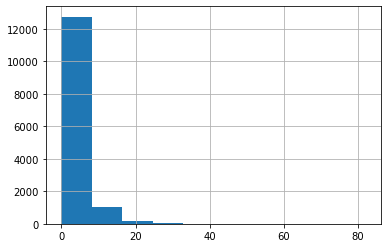

In [144]:
df1['Age_imputed'].hist()

In [145]:
df1['Age_imputed'].isna().sum()

0

In [146]:
# drop 9 rows that could not be imputed for age
df1 = df1[~df1['Age_imputed'].isna()].copy()

#### Servant quarters

In [147]:
df1['Servant Quarters'].isna().sum()/len(df1)

0.645533551788004

In [148]:
df1['Servant Quarters_imputed'] = df1['Servant Quarters'].astype(float).interpolate(method='values')

<AxesSubplot:>

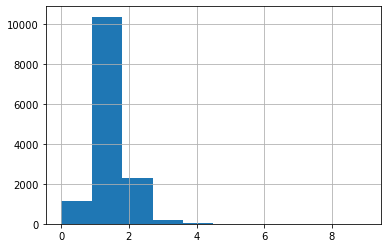

In [149]:
df1['Servant Quarters_imputed'].hist()

In [150]:
df1['Servant Quarters_imputed'].isna().sum()

0

In [151]:
df1 = df1[~df1['Servant Quarters_imputed'].isna()].copy()

#### Parking spaces

In [152]:
df1['Parking Spaces'].isna().sum()/len(df1)

0.6392648525430973

In [153]:
df1['Parking Spaces_imputed'] = df1['Parking Spaces'].astype(float).interpolate(method='values')

<AxesSubplot:>

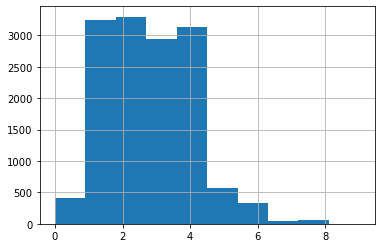

In [154]:
df1['Parking Spaces_imputed'].hist()

In [155]:
df1['Parking Spaces_imputed'].isna().sum()

0

In [156]:
df1 = df1[~df1['Parking Spaces_imputed'].isna()].copy()

In [157]:
df1.drop(columns=['Age', 'Servant Quarters', 'Parking Spaces'], inplace=True)

In [158]:
df1.shape

(14038, 34)

#### Top agencies

In [159]:
top_agencies = df1.groupby(['City', 'Agency', 'Titanium Agency?', 'Agency Video'])['Type', 'Price_rupees_crores', 'Freshness_days'].agg({'Type':'count', 'Price_rupees_crores':'mean', 'Freshness_days':'median'}).reset_index()



/Users/abdur_rehman/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [160]:
top_agencies.rename(columns={'Type': 'Number of Properties', 
                             'Price_rupees_crores': 'Mean Property Price', 
                             'Freshness_days': 'Median Freshness'}, inplace=True)

In [161]:
top_agencies = top_agencies[top_agencies['Number of Properties'] >= 50].copy()

In [162]:
top_agencies.sort_values(by=['City', 'Number of Properties', 'Mean Property Price', 'Median Freshness'], 
                         ascending=[True, False, False, True], inplace=True)


In [163]:
top_agencies = top_agencies[top_agencies['Agency'] != 'No Agency Listed']

In [164]:
top_agencies.reset_index(drop=True, inplace=True)

In [165]:
top_agencies.describe()

,Titanium Agency?,Agency Video,Number of Properties,Mean Property Price,Median Freshness
count,38.0,38.0,38.000000,38.000000,38.000000
mean,0.0,0.0,76.131579,4.332080,9.263158
std,0.0,0.0,26.484234,1.513818,11.325490
min,0.0,0.0,50.000000,0.517284,0.000000
25%,0.0,0.0,55.000000,3.089142,3.125000
50%,0.0,0.0,68.000000,4.642885,5.000000
75%,0.0,0.0,90.000000,5.421748,7.000000
max,0.0,0.0,142.000000,7.125882,60.000000


In [166]:
top_agencies = top_agencies.groupby('City').head(1)

In [167]:
top_agencies = top_agencies['Agency'].tolist()

In [168]:
top_agencies

['Leads Estates']

In [169]:
df_agencies = df1[df1['Agency'].isin(top_agencies)]

In [170]:
df1 = pd.concat([df1, pd.get_dummies(df_agencies['Agency'])], axis=1)

In [171]:
# fill na's with 0 for the recently added agency cols
df1.iloc[:,-3:] = df1.iloc[:,-3:].fillna(0)

In [172]:
pd.set_option('display.max_columns', None)

#### Top localities

In [173]:
price_loc = df1.groupby(['City', 'Locality'])['Price_rupees_crores', 'Property ID'].agg({'Price_rupees_crores': 'mean', 'Property ID': 'count'}).reset_index()



/Users/abdur_rehman/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [174]:
price_loc.columns = ['City', 'Locality', 'Mean Price per Property', 'Number of Properties']

In [175]:
price_loc = price_loc[price_loc['Number of Properties'] > 100].copy()

In [176]:
price_loc.sort_values(by=['City', 'Number of Properties', 'Mean Price per Property'], ascending=[True, False, False], inplace=True)

In [177]:
pd.set_option('min_rows', 100)

In [178]:
# just Defence
price_loc = price_loc.groupby('City').head(3)

In [179]:
price_loc.reset_index(drop=True, inplace=True)

In [180]:
price_loc

,City,Locality,Mean Price per Property,Number of Properties
0,Lahore,DHA Defence,5.330061,3933
1,Lahore,Bahria Town,2.419871,1245
2,Lahore,Johar Town,2.258521,764


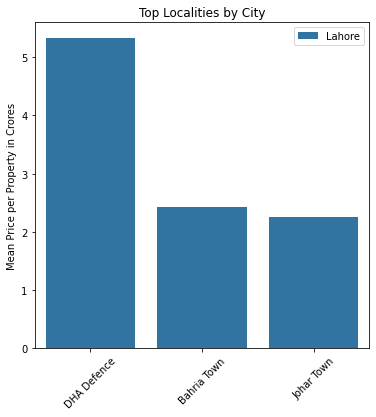

In [181]:
plt.figure(figsize=(6,6))
sns.barplot(x='Locality', y='Mean Price per Property', data=price_loc, hue='City', palette='tab10')
plt.legend(loc='upper right')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Mean Price per Property in Crores')
plt.title('Top Localities by City')
plt.show()

In [182]:
df1['DHA Defence'] = np.where(df1['Locality'] == 'DHA Defence', 1, 0)

In [183]:
# df1.drop(columns=['Age_group', 'New', 'Less than 1 years old', '1-5 years old', '5+ years old'], inplace=True)

### Checks

In [184]:
from pandas.plotting import scatter_matrix

#### Distributions

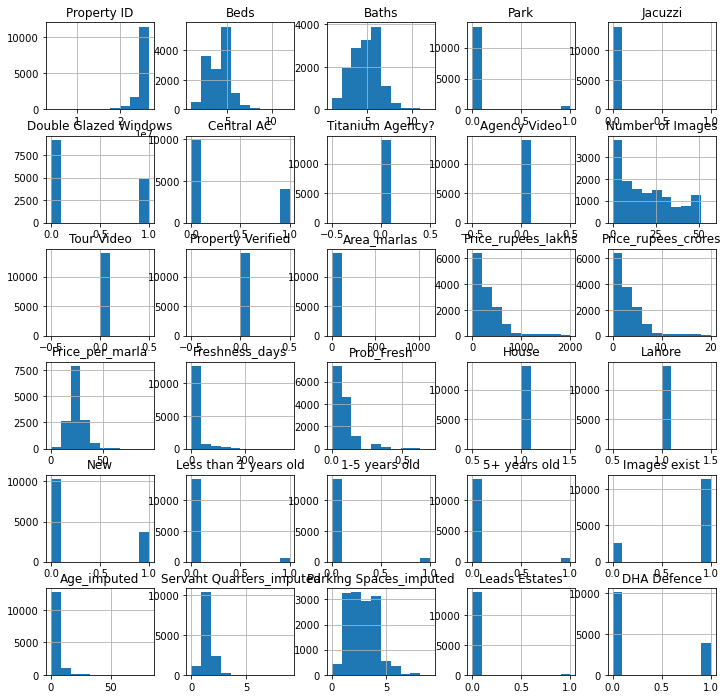

In [185]:
df1.hist(figsize=(12,12))
plt.show()

#### Multicollinearity

In [186]:
df1.corr()['Price_rupees_crores'].sort_values(ascending=False)[2:]

Baths                       0.549198
Beds                        0.526621
Price_per_marla             0.496451
DHA Defence                 0.456378
Area_marlas                 0.396445
Parking Spaces_imputed      0.323737
Central AC                  0.268324
Double Glazed Windows       0.258140
Number of Images            0.257779
Servant Quarters_imputed    0.234787
Park                        0.189887
New                         0.157483
Prob_Fresh                  0.100555
Leads Estates               0.061405
Jacuzzi                     0.054852
Images exist                0.054169
5+ years old                0.049111
Less than 1 years old       0.036977
1-5 years old               0.006811
Age_imputed                -0.006139
Freshness_days             -0.019400
Property ID                -0.029340
Titanium Agency?                 NaN
Agency Video                     NaN
Tour Video                       NaN
Property Verified                NaN
House                            NaN
L

<AxesSubplot:>

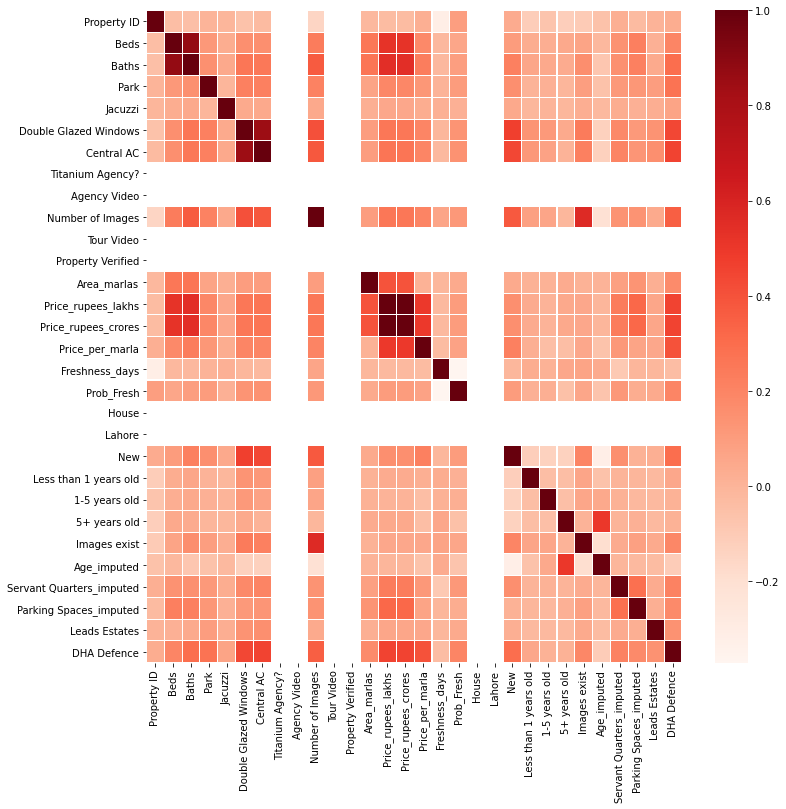

In [187]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), linewidth=0.05, cmap='Reds')

#### Dependent variable

In [188]:
df1['Price_rupees_crores'].describe()

count    14038.000000
mean         3.171244
std          2.951209
min          0.006000
25%          1.250000
50%          2.250000
75%          4.300000
max         20.000000
Name: Price_rupees_crores, dtype: float64

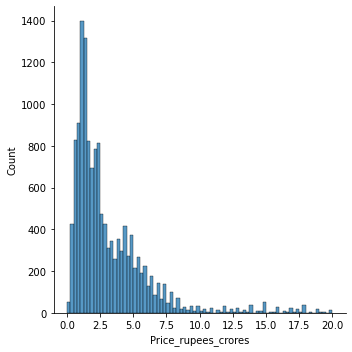

In [189]:
sns.displot(x='Price_rupees_crores', data=df1)

### Modelling

In [190]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

In [191]:
y = df1['Price_rupees_crores'].values

In [192]:
y

array([1.45, 1.35, 5.65, ..., 5.25, 1.7 , 1.85])

In [193]:
df1.columns

Index(['Property ID', 'Type', 'Beds', 'Baths', 'Park', 'Jacuzzi',
       'Double Glazed Windows', 'Central AC', 'Agency', 'Titanium Agency?',
       'Agency Video', 'Number of Images', 'Tour Video', 'Property Verified',
       'Locality', 'City', 'Area_marlas', 'Price_rupees_lakhs',
       'Price_rupees_crores', 'Price_per_marla', 'Freshness_days',
       'Prob_Fresh', 'Date Last Updated', 'House', 'Lahore', 'Age_group',
       'New', 'Less than 1 years old', '1-5 years old', '5+ years old',
       'Images exist', 'Age_imputed', 'Servant Quarters_imputed',
       'Parking Spaces_imputed', 'Leads Estates', 'DHA Defence'],
      dtype='object')

In [194]:
cols = [
# fundamentals
         'Beds', 'Baths', 'Area_marlas',
# amenities
    'Servant Quarters_imputed', 
    'Parking Spaces_imputed', 
    'Age_imputed', 
#     'New',
# location
#         'Islamabad', 'Karachi',
# locality
         'DHA Defence',
# description
         'Park', 
#     'Jacuzzi', 
#     'Double Glazed Windows', 
#     'Central AC',
# agency
# 'Grace Associates', 'Property Inn (PVT) Limited'
# platform – agency
#          'Titanium Agency?', 'Agency Video',
# platform – listing
#          'Images exist', 
#     'Number of Images',
#     'Tour Video',
# platform – activity
#          'Freshness_days'
]

In [195]:
X = df1[cols].values

In [196]:
X

array([[ 3.,  4.,  5., ...,  0.,  0.,  0.],
       [ 3.,  3.,  5., ...,  0.,  0.,  0.],
       [ 5.,  6., 20., ...,  0.,  1.,  0.],
       ...,
       [ 5.,  6., 20., ...,  0.,  1.,  0.],
       [ 5.,  6., 10., ...,  0.,  0.,  0.],
       [ 5.,  6., 10., ...,  0.,  0.,  0.]])

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=786)

In [198]:
X_train.shape, X_test.shape

((8422, 8), (5616, 8))

In [199]:
y_train.shape, y_test.shape

((8422,), (5616,))

##### sklearn – linear regression

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [201]:
lreg0 = LinearRegression(fit_intercept=True)
lreg0 = lreg0.fit(X_train, y_train)

# same as statsmodels
# print(lreg0.intercept_)

# same as statsmodels
# print(lreg0.coef_)

print(lreg0.score(X_test, y_test))

0.34218981527158654


In [202]:
y_preds = lreg0.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(mse, rmse)

5.884719637301706 2.4258441082026905


In [203]:
# results_coeffs = pd.concat([pd.Series(np.array(cols)), pd.Series(lreg0.coef_)], axis=1)
# results_coeffs.rename(columns={0:'Feature', 1:'Importance'}, inplace=True)
# results_coeffs = results_coeffs.sort_values(by='Importance', ascending=False)

##### statsmodels – linear regression

In [205]:
lreg = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [206]:
lreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1203.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        23:42:44   Log-Likelihood:                -17776.
No. Observations:                8422   AIC:                         3.557e+04
Df Residuals:                    8413   BIC:                         3.563e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8340      0.095    -29.911      0.000      -3.020      -2.648
x1             0.4470      0.038     11.888      0.000       0.373       0.521
x2             0.3310      0.032     10.380      0.000       0.269       0.394
x3             0.0590      0.002     38.295      0.000       0.056       0.062
x4             0.3636      0.043      8.399      0.000       0.279       0.448
x5             0.2481      0.017     14.349      0.000       0.214       0.282
x6             0.0327      0.005      6.618      0.000       0.023       0.042
x7             1.6691      0.054     30.696      0.000       1.563       1.776
x8             0.3613      0.108      3.356      0.001       0.150       0.572
==============================================================================
Omnibus:                     6256.897   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9622221.997
Skew:                          -2.100   Prob(JB):                         0.00
Kurtosis:                     168.537   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
df1.columns

Index(['Property ID', 'Type', 'Beds', 'Baths', 'Park', 'Jacuzzi',
       'Double Glazed Windows', 'Central AC', 'Agency', 'Titanium Agency?',
       'Agency Video', 'Number of Images', 'Tour Video', 'Property Verified',
       'Locality', 'City', 'Area_marlas', 'Price_rupees_lakhs',
       'Price_rupees_crores', 'Price_per_marla', 'Freshness_days',
       'Prob_Fresh', 'Date Last Updated', 'House', 'Lahore', 'Age_group',
       'New', 'Less than 1 years old', '1-5 years old', '5+ years old',
       'Images exist', 'Age_imputed', 'Servant Quarters_imputed',
       'Parking Spaces_imputed', 'Leads Estates', 'DHA Defence'],
      dtype='object')

##### Decision Trees

In [208]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [209]:
y = df1['Price_rupees_crores'].values

In [210]:
X = df1[cols].values

In [211]:
# resplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=786)

In [212]:
dt = DecisionTreeRegressor(max_depth=7)

In [213]:
dt = dt.fit(X_train, y_train)

In [214]:
dt.score(X_test, y_test)

0.8056736949490284

In [215]:
dt_features = pd.concat([pd.Series(np.array(cols)), pd.Series(dt.feature_importances_)], axis=1)
dt_features.rename(columns={0:'Feature', 1:'Importance'}, inplace=True)
dt_features = dt_features.sort_values(by='Importance', ascending=False)

In [216]:
dt_features

,Feature,Importance
2,Area_marlas,0.925261
6,DHA Defence,0.029792
5,Age_imputed,0.018247
1,Baths,0.011692
0,Beds,0.005716
3,Servant Quarters_imputed,0.004821
4,Parking Spaces_imputed,0.004470
7,Park,0.000000


In [217]:
mse = mean_squared_error(y_test, y_preds)

In [218]:
rmse = np.sqrt(mse)

In [219]:
print(mse, rmse)

5.884719637301706 2.4258441082026905


#### Random Forests

In [258]:
rf = RandomForestRegressor(max_depth=10, n_estimators=100)

In [259]:
rf = rf.fit(X_train, y_train)

In [260]:
rf.score(X_test, y_test)

0.8354240210497677

In [261]:
y_preds = rf.predict(X_test)

In [262]:
mse = mean_squared_error(y_test, y_preds)

In [263]:
rmse = np.sqrt(mse)

In [264]:
# off by more than a crore
print(mse, rmse)

1.472284129435358 1.213377158774368


#### Feature importances

In [227]:
rf_features = pd.concat([pd.Series(np.array(cols)), pd.Series(rf.feature_importances_)], axis=1)
rf_features.rename(columns={0:'Feature', 1:'Importance'}, inplace=True)
rf_features = rf_features.sort_values(by='Importance', ascending=False)

In [228]:
rf_features

,Feature,Importance
2,Area_marlas,0.882606
5,Age_imputed,0.028348
6,DHA Defence,0.026917
4,Parking Spaces_imputed,0.019347
1,Baths,0.015447
3,Servant Quarters_imputed,0.013788
0,Beds,0.012585
7,Park,0.000960


#### K-folds cross-validation

In [230]:
from sklearn.model_selection import cross_validate

In [231]:
cv = cross_validate(rf, X, y, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.86002287 0.82116747 0.82133962 0.83845184 0.81555363]
0.8313070858698799


In [233]:
# tree.plot_tree(rf0, feature_names=cols, filled=True)
# plt.show()

#### Optimizing max_depth

In [234]:
sns.set()

In [235]:
xs = []
scores = []

for n in range(1,30):    
    rf_ = RandomForestRegressor(max_depth=n)
    rf_ = rf.fit(X_train, y_train)
    rf_score = rf.score(X_test, y_test)
    
    xs.append(n)
    scores.append(rf_score)

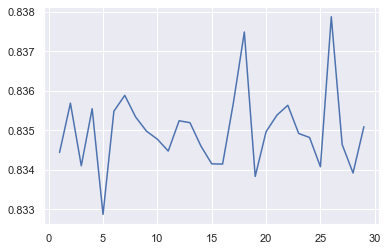

In [236]:
# max accuracy occurs potentially when max_depth = 12 or 2
# plt.ylim([.80,.85])
plt.plot(xs, scores)
# plt.xlim([0,18])

In [238]:
xs[np.where(scores == max(scores))[0][0]]

26

##### kNNs

In [833]:
from sklearn import neighbors

In [834]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)

In [835]:
knn = knn.fit(X_train, y_train)

In [836]:
y_preds = knn.predict(X_test)

In [837]:
# R^2
knn.score(X_test, y_test)

0.23852095284458752

In [838]:
y_preds = knn.predict(X_test)

In [839]:
mse = mean_squared_error(y_test, y_preds)

In [840]:
rmse = np.sqrt(mse)

In [841]:
print(mse, rmse)

0.6115452619610046 0.7820135944860579


#### Optimizing n_neighbors

In [314]:
sns.set()

In [831]:
x = []
y = []

for n in range(1,51):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n, weights='uniform')
    knn = knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    
    x.append(n)
    y.append(score)

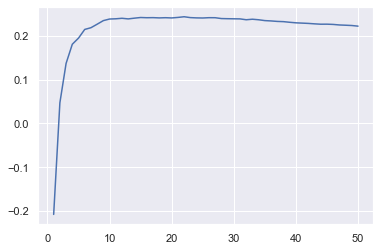

In [832]:
# max accuracy occurs when k=17
plt.plot(x, y)